# Naive Bayes

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
cb = pd.read_csv('/content/Customer_Behaviour.csv')
cb.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
cb.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [ ]:
cb.describe

<bound method NDFrame.describe of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [ ]:
cb = pd.get_dummies(cb)
cb.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


In [ ]:
cb.columns

Index(['User ID', 'Age', 'EstimatedSalary', 'Purchased', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

In [ ]:
cb.drop(['User ID'],inplace=True,axis=1)

In [ ]:
cb.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


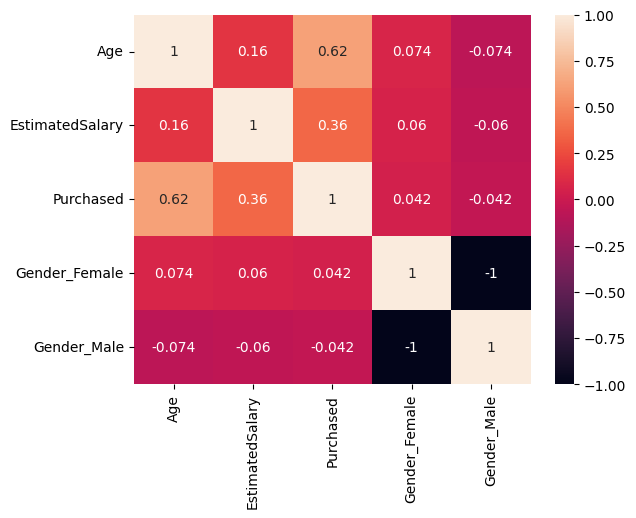

In [ ]:
dataplot = sns.heatmap(cb.corr(),annot=True)

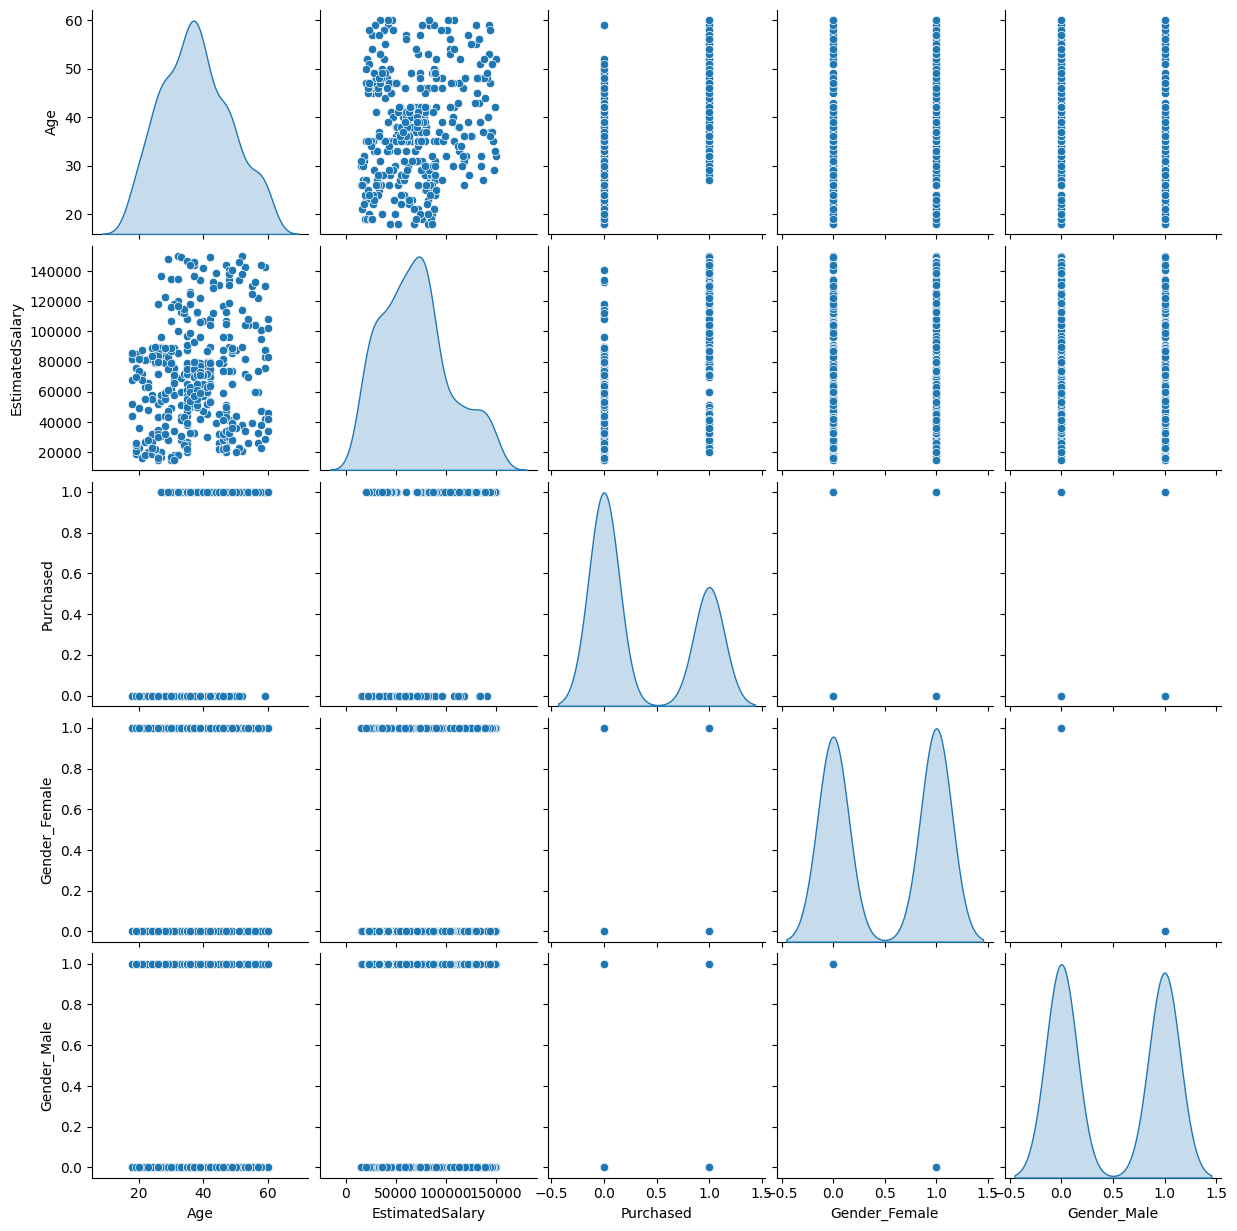

In [ ]:
sns.pairplot(cb,diag_kind='kde')

In [ ]:
X=cb.drop('Purchased',axis=1)
Y=cb['Purchased']
print(X,Y)

     Age  EstimatedSalary  Gender_Female  Gender_Male
0     19            19000              0            1
1     35            20000              0            1
2     26            43000              1            0
3     27            57000              1            0
4     19            76000              0            1
..   ...              ...            ...          ...
395   46            41000              1            0
396   51            23000              0            1
397   50            20000              1            0
398   36            33000              0            1
399   49            36000              1            0

[400 rows x 4 columns] 0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
X_train,X_test,Y_train,Y_test = train_test_split(X.values,Y.values,test_size=0.2)

NameError: name 'X' is not defined

In [ ]:
nb_model1 = GaussianNB()
nb_model1.fit(X_train, Y_train)

GaussianNB()

In [ ]:
predictions = nb_model1.predict(X_test)

In [ ]:
print("Actual Value:", Y_test)
print("Predicted Value:", predictions)

Actual Value: [0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0
 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 1 0 0 1]
Predicted Value: [0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1
 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 1 0 0 1]


In [ ]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

Y_predict = nb_model1.predict(X_test)
accuray = accuracy_score(Y_predict, Y_test)
f1 = f1_score(Y_predict, Y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.925
F1 Score: 0.925


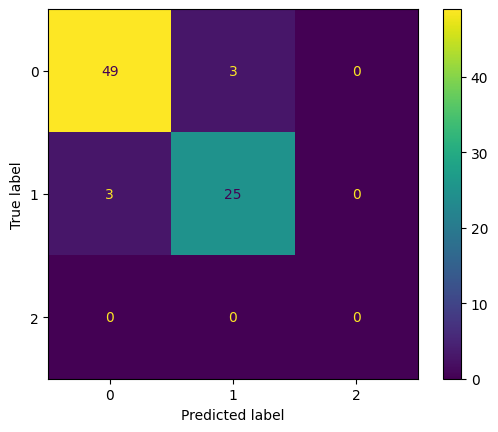

In [ ]:
labels = [0,1]
cm = confusion_matrix(Y_test, Y_predict, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();